## Lab 1: Perceptron for AND and OR Gate logic

In [ ]:
def perceptron(x: list, y: list) -> dict:
    w = np.random.rand(2)
    b = np.random.rand()
    alpha = 0.1

    print(f"Initial weights: {w}, Initial Bias: {b}, Learning Rate: {alpha}")

    error_sum = 1
    iteration = 1

    while error_sum:
        y_pred = []
        error = []

        for i in range(len(x)):
            x_transpose = np.array(x[i]).T
            y_actual = y[i]
            y_pred.append(1 if np.dot(w, x_transpose) + b >= 0 else 0)
            error.append(y_actual - y_pred[i])

        print(f"For epoch: {iteration} -> Y Predicted: {y_pred}, Error: {error}")
        iteration += 1

        w = w + (alpha * np.dot(error, x))
        b = b + (alpha * np.sum(error))

        error_sum = np.sum(error)

    return {
        "weights": w,
        "bias": b
    }

In [ ]:
xor = [[0, 0], [0, 1], [1, 0], [1, 1]]
yor = [0, 1, 1, 1]
ans_or = perceptron(xor, yor)
w, b = ans_or["weights"], ans_or["bias"]
print(f"Updated weights: {w}, Updated bias: {b}")

Initial weights: [0.95407093 0.80195823], Initial Bias: 0.29058638007579674, Learning Rate: 1000000
For iteration: 1 -> Y Predicted: [1, 1, 1, 1], Error: [-1, 0, 0, 0]
For iteration: 2 -> Y Predicted: [0, 0, 0, 0], Error: [0, 1, 1, 1]
For iteration: 3 -> Y Predicted: [1, 1, 1, 1], Error: [-1, 0, 0, 0]
For iteration: 4 -> Y Predicted: [1, 1, 1, 1], Error: [-1, 0, 0, 0]
For iteration: 5 -> Y Predicted: [1, 1, 1, 1], Error: [-1, 0, 0, 0]
For iteration: 6 -> Y Predicted: [0, 1, 1, 1], Error: [0, 0, 0, 0]
Updated weights: [2000000.95407093 2000000.80195823], Updated bias: -999999.70941362


In [ ]:
xand = [[0, 0], [0, 1], [1, 0], [1, 1]]
yand = [0, 0, 0, 1]
ans_and = perceptron(xand, yand)
w, b = ans_and["weights"], ans_and["bias"]
print(f"Updated weights: {w}, Updated bias: {b}")

Initial weights: [0.11501187 0.45702835], Initial Bias: 0.6575767141924252, Learning Rate: 0.5678844018930616
For iteration: 1 -> Y Predicted: [1, 1, 1, 1], Error: [-1, -1, -1, 0]
For iteration: 2 -> Y Predicted: [0, 0, 0, 0], Error: [0, 0, 0, 1]
For iteration: 3 -> Y Predicted: [0, 0, 0, 1], Error: [0, 0, 0, 0]
Updated weights: [0.11501187 0.45702835], Updated bias: -0.47819208959369797


## Lab 2: Hebbian learning for NAND and NOR Gate logic

In [ ]:
def hebbianNeuron(x: list, y: list) -> dict:
    w = np.random.rand(2)
    b = np.random.rand()
    alpha = 0.5

    print(f"Initial weights: {w}, Initial Bias: {b}, Learning Rate: {alpha}")

    error_sum = 1
    epoch = 1

    while error_sum:
        y_pred = []
        error = []

        for i in range(len(x)):
            w = w + (alpha * y[i] * np.array(x[i]))
            b = b + (alpha * y[i])
            y_pred.append(1 if np.dot(w, x[i]) + b >= 0 else -1)
            error.append(y[i] - y_pred[i])

        print(f"For epoch: {epoch} -> Y Predicted: {y_pred}, Error: {error}, weights =: {w}, bias: {b}")
        epoch += 1
        error_sum = not np.all(np.array(error) == 0)

    return {
        "weights": w,
        "bias": b
    }

In [ ]:
xnand = [[-1, -1], [-1, 1], [1, -1], [1, 1]]
ynand = [1, 1, 1, -1]
ans_nand = hebbianNeuron(xnand, ynand)
w_nand, b_nand = ans_nand["weights"], ans_nand["bias"]
print(f"Updated weights: {w_nand}, Updated bias: {b_nand}")

Initial weights: [0.82193657 0.35939894], Initial Bias: 0.3942285766675634, Learning Rate: 0.5
For epoch: 1 -> Y Predicted: [1, 1, 1, 1], Error: [0, 0, 0, -2], weights =: [-0.17806343 -0.64060106], bias: 1.3942285766675635
For epoch: 2 -> Y Predicted: [1, 1, 1, -1], Error: [0, 0, 0, 0], weights =: [-1.17806343 -1.64060106], bias: 2.3942285766675635
Updated weights: [-1.17806343 -1.64060106], Updated bias: 2.3942285766675635


In [ ]:
xnor = [[-1, -1], [-1, 1], [1, -1], [1, 1]]
ynor = [1, -1, -1, -1]
ans_nor = hebbianNeuron(xnor, ynor)
w_nor, b_nor = ans_nor["weights"], ans_nor["bias"]
print(f"Updated weights: {w_nor}, Updated bias: {b_nor}")

Initial weights: [0.41662853 0.22107214], Initial Bias: 0.8942201131525417, Learning Rate: 0.5
For epoch: 1 -> Y Predicted: [1, -1, 1, -1], Error: [0, 0, -2, 0], weights =: [-0.58337147 -0.77892786], bias: -0.1057798868474582
For epoch: 2 -> Y Predicted: [1, -1, -1, -1], Error: [0, 0, 0, 0], weights =: [-1.58337147 -1.77892786], bias: -1.1057798868474582
Updated weights: [-1.58337147 -1.77892786], Updated bias: -1.1057798868474582


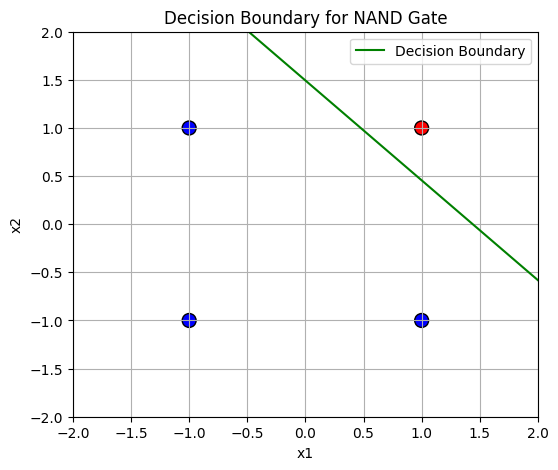

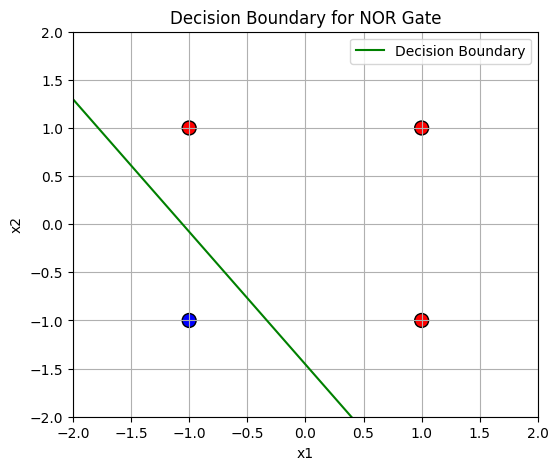

In [ ]:
def plot_decision_boundary(weights, bias, X, Y, gate_name):
    X = np.array(X)
    Y = np.array(Y)
    colors = ['blue' if y == 1 else 'red' for y in Y]
    plt.figure(figsize=(6,5))
    plt.scatter(X[:,0], X[:,1], c=colors, edgecolors='k', s=100)
    x_vals = np.linspace(-2, 2, 10)
    y_vals = (-bias - weights[0]*x_vals) / weights[1]
    plt.plot(x_vals, y_vals, 'g-', label='Decision Boundary')
    plt.title(f"Decision Boundary for {gate_name} Gate")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_decision_boundary(w_nand, b_nand, xnand, ynand, "NAND")
plot_decision_boundary(w_nor, b_nor, xnor, ynor, "NOR")

In [ ]:
alphas = [0.01, 0.1, 0.5, 1, 5]

In [ ]:
x_epoochs = [58, 9, 2, 2, 1]
y_epoochs = [52, 7, 2, 1, 1]

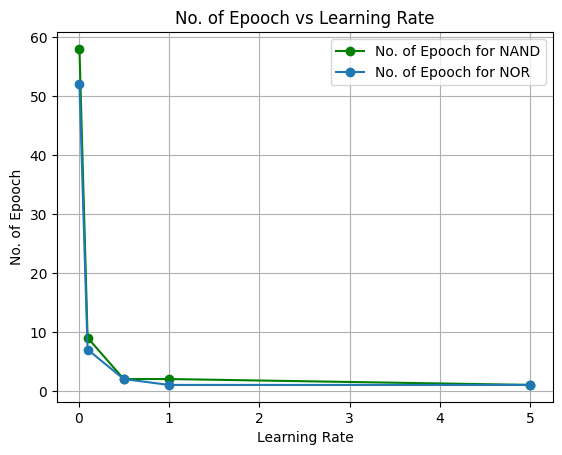

In [ ]:
plt.plot(alphas, x_epoochs, 'g-', marker='o', label='No. of Epooch for NAND')
plt.plot(alphas, y_epoochs, marker='o', label='No. of Epooch for NOR')
plt.title("No. of Epooch vs Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("No. of Epooch")
plt.legend()
plt.grid(True)
plt.show()

## Lab 3: Solve the following Boolean function using Perceptron learning rule:
1. Z = XY + X + Y
2. Z = XY + X
3. Z = X + Y + (~X)Y
4. Z = XY + (\~X)Y + (\~Y)X  


In [ ]:
def perceptron(x: list, y: list) -> dict:
    w = np.random.rand(2)
    b = np.random.rand()
    alpha = 0.1

    print(f"Initial weights: {w}, Initial Bias: {b}, Learning Rate: {alpha}")

    error_sum = 1
    iteration = 1

    while error_sum:
        y_pred = []
        error = []

        for i in range(len(x)):
            x_transpose = np.array(x[i]).T
            y_actual = y[i]
            y_pred.append(1 if np.dot(w, x_transpose) + b >= 0 else 0)
            error.append(y_actual - y_pred[i])

        print(f"For epoch: {iteration} -> Y Predicted: {y_pred}, Error: {error}")
        iteration += 1

        w = w + (alpha * np.dot(error, x))
        b = b + (alpha * np.sum(error))

        error_sum = not np.all(np.array(error) == 0)

    return {
        "weights": w,
        "bias": b
    }

In [ ]:
input_eq_4 = [[0, 0], [0, 1], [1, 0], [1, 1]]
output_eq_4 = [0, 1, 1, 1]

ans_or = perceptron(input_eq_4, output_eq_4)
w_or, b_or = ans_or["weights"], ans_or["bias"]
print(f"Updated weights: {w_or}, Updated bias: {b_or}")

Initial weights: [0.65562081 0.82826125], Initial Bias: 0.32575445864206576, Learning Rate: 0.1
For epoch: 1 -> Y Predicted: [1, 1, 1, 1], Error: [-1, 0, 0, 0]
For epoch: 2 -> Y Predicted: [1, 1, 1, 1], Error: [-1, 0, 0, 0]
For epoch: 3 -> Y Predicted: [1, 1, 1, 1], Error: [-1, 0, 0, 0]
For epoch: 4 -> Y Predicted: [1, 1, 1, 1], Error: [-1, 0, 0, 0]
For epoch: 5 -> Y Predicted: [0, 1, 1, 1], Error: [0, 0, 0, 0]
Updated weights: [0.65562081 0.82826125], Updated bias: -0.07424554135793426


In [ ]:
# Validation
prediction = []
for data in input_eq_1:
    prediction.append(1 if np.dot(w_or, data) + b_or >= 0 else 0)
prediction

[0, 1, 1, 1]

In [ ]:
input_eq_2 = [[0, 0], [0, 1], [1, 0], [1, 1]]
output_eq_2 = [0, 0, 1, 1]

ans_or = perceptron(input_eq_2, output_eq_2)
w_and, b_and = ans_or["weights"], ans_or["bias"]
print(f"Updated weights: {w_and}, Updated bias: {b_and}")

Initial weights: [0.88448535 0.34898255], Initial Bias: 0.9697797710039294, Learning Rate: 0.1
For epoch: 1 -> Y Predicted: [1, 1, 1, 1], Error: [-1, -1, 0, 0]
For epoch: 2 -> Y Predicted: [1, 1, 1, 1], Error: [-1, -1, 0, 0]
For epoch: 3 -> Y Predicted: [1, 1, 1, 1], Error: [-1, -1, 0, 0]
For epoch: 4 -> Y Predicted: [1, 1, 1, 1], Error: [-1, -1, 0, 0]
For epoch: 5 -> Y Predicted: [1, 1, 1, 1], Error: [-1, -1, 0, 0]
For epoch: 6 -> Y Predicted: [0, 0, 1, 1], Error: [0, 0, 0, 0]
Updated weights: [ 0.88448535 -0.15101745], Updated bias: -0.03022022899607063


In [ ]:
# Validation
prediction = []
for data in input_eq_1:
    prediction.append(1 if np.dot(w_and, data) + b_and >= 0 else 0)
prediction

[0, 0, 1, 1]

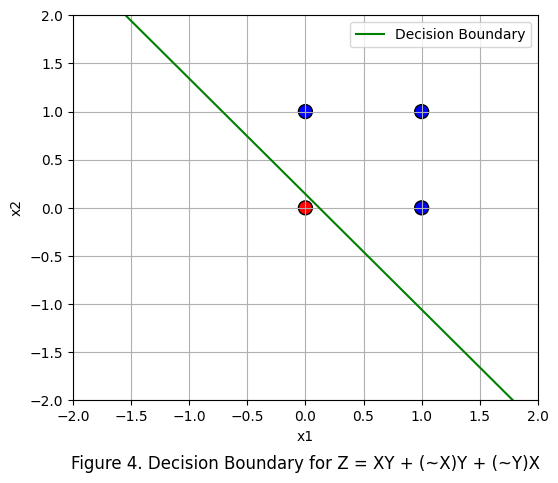

In [ ]:
def plot_decision_boundary(weights, bias, X, Y, gate_name):
    X = np.array(X)
    Y = np.array(Y)
    colors = ['blue' if y == 1 else 'red' for y in Y]
    plt.figure(figsize=(6,5))
    plt.scatter(X[:,0], X[:,1], c=colors, edgecolors='k', s=100)
    x_vals = np.linspace(-2, 2, 10)
    y_vals = (-bias - weights[0]*x_vals) / weights[1]
    plt.plot(x_vals, y_vals, 'g-', label='Decision Boundary')
    plt.title(f"Figure 8. Decision Boundary for {gate_name}", y=-0.2)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_decision_boundary(w_or, b_or, input_eq_1, output_eq_1, "Z = XY + (~X)Y + (~Y)X")

In [ ]:
import pandas as pd

# Given input and output
input_eq_1 = [[0, 0], [0, 1], [1, 0], [1, 1]]
output_eq_1 = [0, 0, 1, 1]

# Create a DataFrame
df = pd.DataFrame(input_eq_1, columns=['X', 'Y'])
df['Z'] = output_eq_1

# Display the table
print(df)


   X  Y  Z
0  0  0  0
1  0  1  0
2  1  0  1
3  1  1  1


## Lab 4
f(x) = x1^3 + 2*x1*x2 - x1^2*x2^2

Iteration 1: x = [ 0.5 -0.5]
Iteration 2: x = [ 0.15853659 -0.04878049]
Iteration 3: x = [0.00327746 0.03485617]


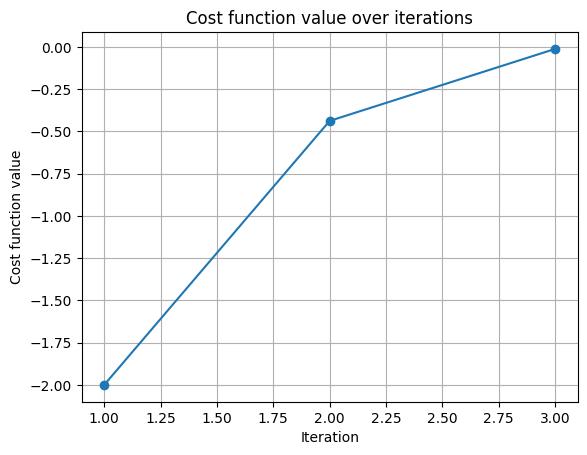

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def f(x1, x2):
  return x1**3 + 2 * x1 * x2 - (x1**2) * (x2**2)

def gradient_f(x1, x2):
  df_dx1 = 3 * x1**2 + 2 * x2 - 2 * x1 * x2**2
  df_dx2 = 2 * x1 - 2 * x1**2 * x2
  return np.array([df_dx1, df_dx2])

def hessian_f(x1, x2):
  d2f_dx1_dx1 = 6 * x1 - 2 * x2**2
  d2f_dx1_dx2 = 2 - 4 * x1 * x2
  d2f_dx2_dx1 = 2 - 4 * x1 * x2
  d2f_dx2_dx2 = -2 * x1**2
  return np.array([[d2f_dx1_dx1, d2f_dx1_dx2], [d2f_dx2_dx1, d2f_dx2_dx2]])

x = np.array([1.0, -1.0])

num_iterations = 3

f_values = []

for i in range(num_iterations):
  f_values.append(f(x[0], x[1]))

  gradient = gradient_f(x[0], x[1])

  hessian = hessian_f(x[0], x[1])

  hessian_inv = np.linalg.inv(hessian)

  x = x - np.dot(hessian_inv, gradient)
  print(f"Iteration {i+1}: x = {x}")

plt.plot(range(1, num_iterations + 1), f_values, marker='o', linestyle='-')
plt.title("Cost function value over iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost function value")
plt.grid(True)
plt.show()

## Lab 5
Demonstrate that EX-OR and XNOR gate is a non-linearly separable problem. Design a MLP for the purpose and train it using BP algorithm. Assume the use of a logistic function for the nonlinearity.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

w11 = 0.1
w12 = 0.2
w21 = -0.1
w22 = 0.1
weights_hidden = np.array([[w11, w21], [w12, w22]])

# Weights from hidden to output layer
v1 = 0.1
v2 = -0.2
weights_output = np.array([[v1], [v2]])

# Biases
b0 = 0.0
b1 = 0.0
b2 = 0.0
biases_hidden = np.array([b1, b2])
bias_output = np.array([b0])

# Learning rate
eta = 0.5

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
T = np.array([[0], [1], [1], [0]])

for i in [1, 2]: # Iterate over indices for (0,1) and (1,0)
    x = X[i]
    t = T[i]

    # --- FORWARD PASS ---
    print(f"\n--- Forward Pass for Input: {x} ---")

    # 1. Calculate hidden layer outputs (h)
    net_h = np.dot(x, weights_hidden) + biases_hidden
    h = sigmoid(net_h)
    print(f"Hidden layer net input: {net_h}")
    print(f"Hidden layer output: {h}")

    # 2. Calculate output layer output (y)
    net_y = np.dot(h, weights_output) + bias_output
    y = sigmoid(net_y)
    print(f"Output layer net input: {net_y}")
    print(f"Final output y: {y}")

    # 3. Calculate error
    error = 0.5 * (t - y)**2
    print(f"Target (t): {t}, Predicted (y): {y}")
    print(f"Error: {error}")

    # --- BACKWARD PASS ---
    print("\n--- Backward Pass ---")

    # 1. Calculate error gradient for the output layer
    delta_output = (t - y) * sigmoid_derivative(y)
    print(f"Output layer delta: {delta_output}")

    # 2. Update hidden-to-output weights and bias
    d_v = eta * delta_output * h.reshape(-1, 1)
    d_b0 = eta * delta_output

    weights_output += d_v
    bias_output += d_b0
    print(f"Updated hidden-to-output weights:\n{weights_output}")
    print(f"Updated output bias: {bias_output}")

    # 3. Calculate error gradient for the hidden layer
    delta_hidden = delta_output * weights_output.T * sigmoid_derivative(h)
    print(f"Hidden layer deltas: {delta_hidden.flatten()}")

    # 4. Update input-to-hidden weights and biases
    d_w = eta * np.outer(x, delta_hidden)
    d_b_hidden = eta * delta_hidden.flatten()

    weights_hidden += d_w
    biases_hidden += d_b_hidden
    print(f"Updated input-to-hidden weights:\n{weights_hidden}")
    print(f"Updated hidden biases: {biases_hidden}")

print("\n--- Training complete for one epoch (excluding [0,0] and [1,1]). ---")


--- Forward Pass for Input: [0 1] ---
Hidden layer net input: [0.2 0.1]
Hidden layer output: [0.549834   0.52497919]
Output layer net input: [-0.05001244]
Final output y: [0.4874995]
Target (t): [1], Predicted (y): [0.4874995]
Error: [0.13132838]

--- Backward Pass ---
Output layer delta: [0.12804504]
Updated hidden-to-output weights:
[[ 0.13520176]
 [-0.16638951]]
Updated output bias: [0.06402252]
Hidden layer deltas: [ 0.00428499 -0.00531304]
Updated input-to-hidden weights:
[[ 0.1        -0.1       ]
 [ 0.20214249  0.09734348]]
Updated hidden biases: [ 0.00214249 -0.00265652]

--- Forward Pass for Input: [1 0] ---
Hidden layer net input: [ 0.10214249 -0.10265652]
Hidden layer output: [0.52551345 0.47435838]
Output layer net input: [0.0561446]
Final output y: [0.51403247]
Target (t): [1], Predicted (y): [0.51403247]
Error: [0.11808222]

--- Backward Pass ---
Output layer delta: [0.12139619]
Updated hidden-to-output weights:
[[ 0.16709942]
 [-0.13759686]]
Updated output bias: [0.1247

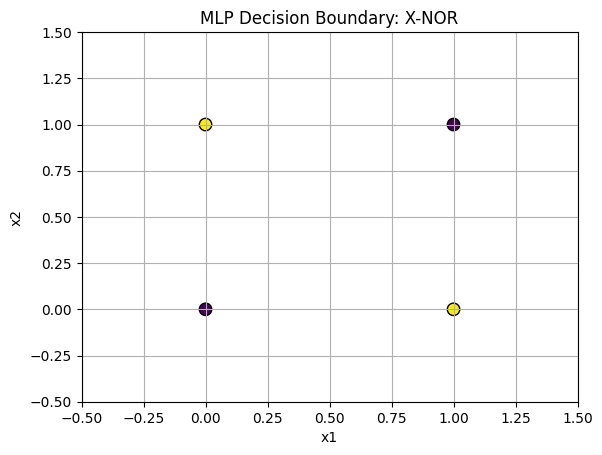

In [2]:
# Plotting the decision boundary for X-NOR
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

inputs_mesh = np.c_[xx.ravel(), yy.ravel()]

net_h_mesh = np.dot(inputs_mesh, weights_hidden) + biases_hidden
h_mesh = sigmoid(net_h_mesh)

net_y_mesh = np.dot(h_mesh, weights_output) + bias_output
y_pred_mesh = sigmoid(net_y_mesh)

Z = y_pred_mesh.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0.5], colors='k')
plt.scatter(X[:, 0], X[:, 1], c=T.flatten(), edgecolor='k', s=80)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('MLP Decision Boundary: X-NOR')
plt.grid(True)
plt.show()

Final Hidden Layer Weights:
 [[-4.15152521  2.82476372]
 [ 3.88347737 -3.1011972 ]]
Final Hidden Layer Biases:
 [[-2.54326243 -1.59314835]]
Final Output Layer Weights:
 [[4.28313096]
 [3.86360109]]
Final Output Layer Biases:
 [[-1.97978152]]


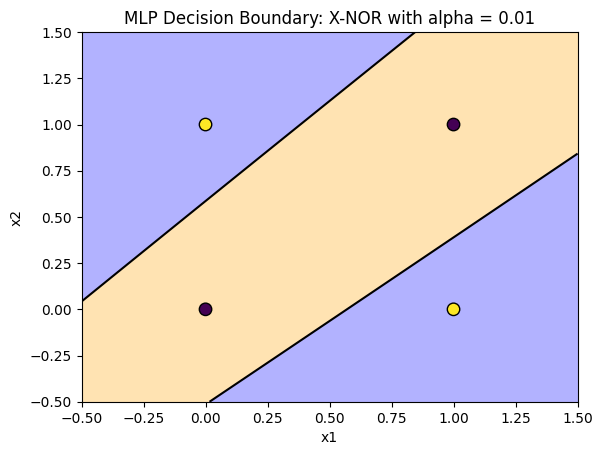

Predictions: [0 1 1 0]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return x * (1 - x)

def multi_layer_perceptron(x, y, epochs=10000, lr=0.1):
    x = np.array(x)
    y = np.array(y).reshape(-1, 1)
    input_size = 2
    hidden_size = 2
    output_size = 1

    w_hidden = np.random.randn(input_size, hidden_size) * np.sqrt(2 / (input_size + hidden_size))
    b_hidden = np.zeros((1, hidden_size))
    w_output = np.random.randn(hidden_size, output_size) * np.sqrt(2 / (hidden_size + output_size))
    b_output = np.zeros((1, output_size))

    for epoch in range(epochs):
        hidden_in = np.dot(x, w_hidden) + b_hidden
        hidden_out = sigmoid(hidden_in)
        final_in = np.dot(hidden_out, w_output) + b_output
        y_pred = sigmoid(final_in)

        error = y - y_pred
        d_output = error * sigmoid_deriv(y_pred)
        error_hidden = d_output @ w_output.T
        d_hidden = error_hidden * sigmoid_deriv(hidden_out)

        # Update
        w_output += hidden_out.T @ d_output * lr
        b_output += np.sum(d_output, axis=0, keepdims=True) * lr
        w_hidden += x.T @ d_hidden * lr
        b_hidden += np.sum(d_hidden, axis=0, keepdims=True) * lr

    # Print final weights and biases
    print("Final Hidden Layer Weights:\n", w_hidden)
    print("Final Hidden Layer Biases:\n", b_hidden)
    print("Final Output Layer Weights:\n", w_output)
    print("Final Output Layer Biases:\n", b_output)

    return {
        "weights_hidden": w_hidden,
        "weights_output": w_output,
        "bias_hidden": b_hidden,
        "bias_output": b_output
    }

X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 1, 1, 0])

params = multi_layer_perceptron(X, y, epochs=30000, lr=0.01)

def mlp_predict(xx, yy, params):
    xy = np.c_[xx.ravel(), yy.ravel()]
    h = sigmoid(np.dot(xy, params["weights_hidden"]) + params["bias_hidden"])
    o = sigmoid(np.dot(h, params["weights_output"]) + params["bias_output"])
    return o.reshape(xx.shape)

# Plotting the decision boundary for X-NOR
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = mlp_predict(xx, yy, params)

plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], colors=['orange', 'blue'], alpha=0.3)
plt.contour(xx, yy, Z, levels=[0.5], colors='k')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=80)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('MLP Decision Boundary: X-NOR with alpha = 0.01')
plt.show()

mlp_outputs = mlp_predict(X[:, 0], X[:, 1], params)
print("Predictions:", (mlp_outputs.ravel() > 0.5).astype(int))


# Lab 6

Given the dataset {-2,-1,0,1,2} with targets t(-2)=0, t(-1)=0.25, t(0)=0.5, t(1)=0.75 and t(2)=1. Determine the weights of all neurons with sigmoid transfer function such that the MSE is almost zero and if we use the neural network with five neurons in the first layer and one neuron in the second layer.


Training with learning rate = 0.1

→ Converged in 3000000 epochs
→ Final MSE = 1.16181961e-06

Final Weights and Biases:
W1:
 [[-0.7108688   2.69942149  0.69199512  3.01829598  1.8349795 ]]
b1:
 [[ 0.39396711 -4.04868054 -0.50319843  4.31088894 -0.14848661]]
W2:
 [[-7.48431615]
 [ 7.24386632]
 [ 6.47552904]
 [ 6.85956256]
 [-7.2844226 ]]
b2:
 [[-1.49061197]]


Training with learning rate = 0.01

→ Converged in 3000000 epochs
→ Final MSE = 2.50450457e-03

Final Weights and Biases:
W1:
 [[-0.26493958  0.26496071  0.26497205  0.26534768 -0.26499035]]
b1:
 [[ 0.03554485 -0.04543205 -0.041302    0.00458204  0.02554802]]
W2:
 [[-4.59577782]
 [ 4.04430518]
 [ 4.01465567]
 [ 3.46674866]
 [-4.51929043]]
b2:
 [[-1.05432972]]


Training with learning rate = 0.001

→ Converged in 3000000 epochs
→ Final MSE = 2.81744456e-03

Final Weights and Biases:
W1:
 [[-0.47529476  0.47580137  0.47590911  0.47860863 -0.47554081]]
b1:
 [[ 0.03179144 -0.03445737 -0.03348259 -0.02009273  0.02967426]]
W2:
 [[-2.5

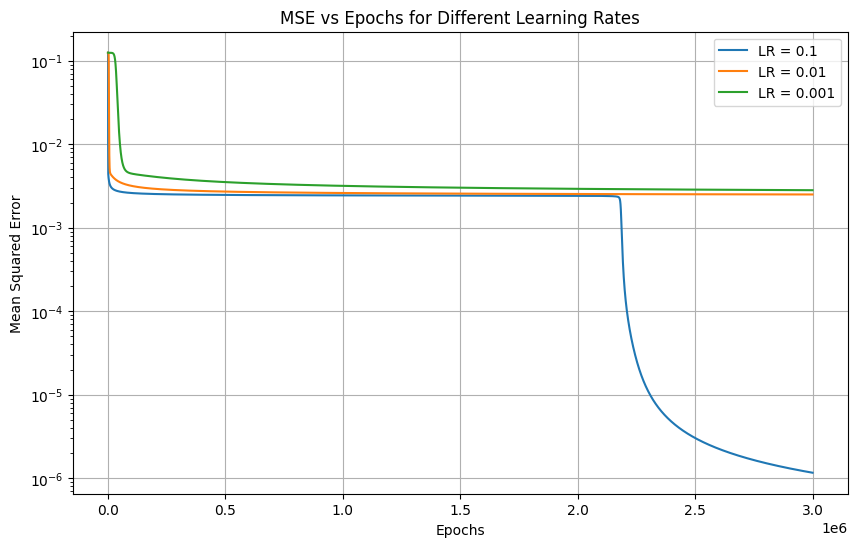

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training function
def train_nn(X, y, learning_rate, max_epochs=3000000, target_mse=1e-6):
    np.random.seed(42)

    # Network architecture
    n_input = 1
    n_hidden = 5
    n_output = 1

    # Weight initialization
    W1 = np.random.randn(n_input, n_hidden) * 0.01
    b1 = np.zeros((1, n_hidden))
    W2 = np.random.randn(n_hidden, n_output) * 0.01
    b2 = np.zeros((1, n_output))

    mse_history = []
    epoch = 0

    while True:
        # Forward pass
        z1 = np.dot(X, W1) + b1
        a1 = sigmoid(z1)
        z2 = np.dot(a1, W2) + b2
        a2 = sigmoid(z2)

        # Compute mean squared error
        mse = np.mean((y - a2) ** 2)
        mse_history.append(mse)
        epoch += 1

        # Check convergence
        if mse < target_mse or epoch >= max_epochs:
            break

        # Backpropagation
        error = y - a2
        d_a2 = error * sigmoid_derivative(a2)
        dW2 = np.dot(a1.T, d_a2)
        db2 = np.sum(d_a2, axis=0, keepdims=True)

        d_a1 = np.dot(d_a2, W2.T) * sigmoid_derivative(a1)
        dW1 = np.dot(X.T, d_a1)
        db1 = np.sum(d_a1, axis=0, keepdims=True)

        # Update weights
        W1 += learning_rate * dW1
        b1 += learning_rate * db1
        W2 += learning_rate * dW2
        b2 += learning_rate * db2

    return W1, b1, W2, b2, mse_history, epoch

# Dataset
X = np.array([-2, -1, 0, 1, 2])
y = np.array([0, 0.25, 0.5, 0.75, 1])

# Train with different learning rates
learning_rates = [0.1, 0.01, 0.001]
histories = {}

for lr in learning_rates:
    print(f"Training with learning rate = {lr}")


    W1, b1, W2, b2, mse_history, epochs = train_nn(X, y, lr)
    histories[lr] = mse_history

    print(f"\n→ Converged in {epochs} epochs")
    print(f"→ Final MSE = {mse_history[-1]:.8e}\n")

    # Print weights and biases
    print("Final Weights and Biases:")
    print("W1:\n", W1)
    print("b1:\n", b1)
    print("W2:\n", W2)
    print("b2:\n", b2)
    print("\n" + "="*60)

# Plot MSE vs epochs
plt.figure(figsize=(10,6))
for lr, mse_history in histories.items():
    plt.plot(range(len(mse_history)), mse_history, label=f'LR = {lr}')

plt.title("MSE vs Epochs for Different Learning Rates")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.yscale('log')  # log scale for clarity
plt.legend()
plt.grid(True)
plt.show()


# Lab 7
Implement a 2-input EX-OR gate using regularized RBF (use 4 centres). Plot the output surface for different input variables. Extend this for a 3 input RBF using 8 centers. Tabulate the input output pattern mapping for each case.

/tmp/ipython-input-1618561191.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y_surface[i, j] = phi @ W


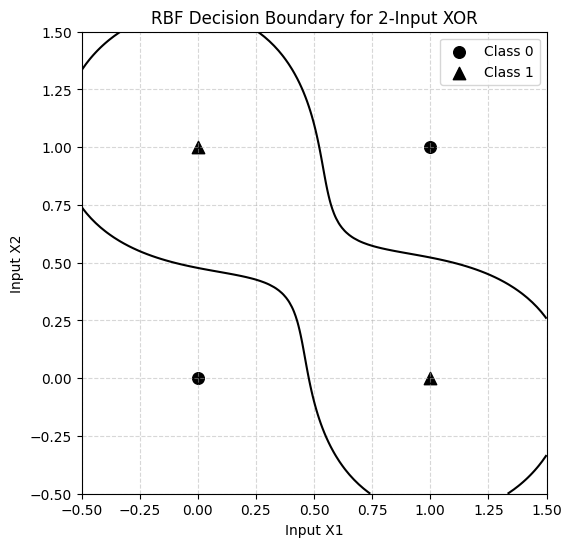

In [8]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
T = np.array([[0], [1], [1], [0]])
C = X.copy()
spread = 0.5
lambda_reg = 0.01

def rbf(x, c, s):
 return np.exp(-np.linalg.norm(x - c) ** 2 / (2 * s ** 2))

J = np.zeros((X.shape[0], C.shape[0]))
for i in range(X.shape[0]):
 for j in range(C.shape[0]):
  J[i, j] = rbf(X[i], C[j], spread)

W = np.linalg.inv(J.T @ J + lambda_reg * np.eye(J.shape[1])) @ J.T @ T
Y = J @ W

x1 = np.linspace(-0.5, 1.5, 100)
x2 = np.linspace(-0.5, 1.5, 100)
X1, X2 = np.meshgrid(x1, x2)
Y_surface = np.zeros_like(X1)

for i in range(X1.shape[0]):
 for j in range(X1.shape[1]):
  x_input = np.array([X1[i, j], X2[i, j]])
  phi = np.array([rbf(x_input, c, spread) for c in C])
  Y_surface[i, j] = phi @ W

plt.figure(figsize=(6, 6))
plt.contour(X1, X2, Y_surface, levels=[0.5], colors='black', linewidths=1.5)
plt.scatter(X[T[:, 0] == 0, 0], X[T[:, 0] == 0, 1], marker='o', color='k', s=70, label='Class 0')
plt.scatter(X[T[:, 0] == 1, 0], X[T[:, 0] == 1, 1], marker='^', color='k', s=80, label='Class 1')
plt.title('RBF Decision Boundary for 2-Input XOR')
plt.xlabel('Input X1')
plt.ylabel('Input X2')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

/tmp/ipython-input-3494082869.py:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y_surface[i, j] = phi @ W


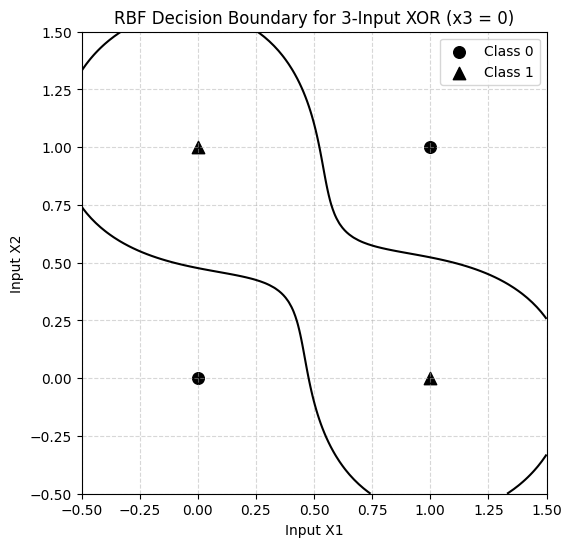

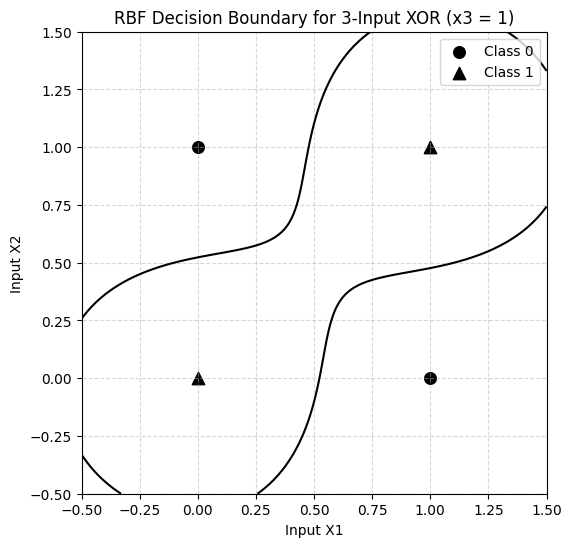

In [9]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([
 [0, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 1],
 [1, 0, 0],
 [1, 0, 1],
 [1, 1, 0],
 [1, 1, 1]
])
T = np.array([[0], [1], [1], [0], [1], [0], [0], [1]])
C = X.copy()
spread = 0.5
lambda_reg = 0.01

def rbf(x, c, s):
 return np.exp(-np.linalg.norm(x - c) ** 2 / (2 * s ** 2))

J = np.zeros((X.shape[0], C.shape[0]))
for i in range(X.shape[0]):
 for j in range(C.shape[0]):
  J[i, j] = rbf(X[i], C[j], spread)

W = np.linalg.inv(J.T @ J + lambda_reg * np.eye(J.shape[1])) @ J.T @ T
Y = J @ W

x1 = np.linspace(-0.5, 1.5, 100)
x2 = np.linspace(-0.5, 1.5, 100)
X1, X2 = np.meshgrid(x1, x2)

for fixed_x3 in [0, 1]:
 Y_surface = np.zeros_like(X1)
 for i in range(X1.shape[0]):
  for j in range(X1.shape[1]):
    x_input = np.array([X1[i, j], X2[i, j], fixed_x3])
    phi = np.array([rbf(x_input, c, spread) for c in C])
    Y_surface[i, j] = phi @ W

 plt.figure(figsize=(6, 6))
 plt.contour(X1, X2, Y_surface, levels=[0.5], colors='black', linewidths=1.5)
 class0 = (T[:, 0] == 0) & (X[:, 2] == fixed_x3)
 class1 = (T[:, 0] == 1) & (X[:, 2] == fixed_x3)
 plt.scatter(X[class0, 0], X[class0, 1], marker='o', color='k', s=70, label='Class 0')
 plt.scatter(X[class1, 0], X[class1, 1], marker='^', color='k', s=80, label='Class 1')
 plt.title(f'RBF Decision Boundary for 3-Input XOR (x3 = {fixed_x3})')
 plt.xlabel('Input X1')
 plt.ylabel('Input X2')
 plt.grid(True, linestyle='--', alpha=0.5)
 plt.legend()
 plt.show()

# Lab 8
Using Mamdani and Sugeno model Fuzzy system, design a non-stationary time series prediction network to predict the output against time sample.

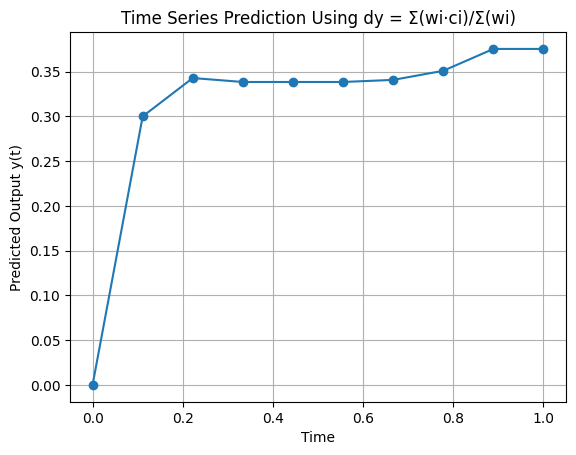

In [11]:
import numpy as np
import matplotlib.pyplot as plt

Y_0 = 0.0
T_STEPS = 10

RULES = [
    {'y': 'Low', 'tau': 'Early', 'mamdani_center': 0.3},
    {'y': 'Low', 'tau': 'Mid', 'mamdani_center': 0.15},
    {'y': 'Low', 'tau': 'Late', 'mamdani_center': 0.0},
    {'y': 'Medium', 'tau': 'Early', 'mamdani_center': 0.3},
    {'y': 'Medium', 'tau': 'Mid', 'mamdani_center': 0.0},
    {'y': 'Medium', 'tau': 'Late', 'mamdani_center': -0.3},
    {'y': 'High', 'tau': 'Early', 'mamdani_center': -0.3},
    {'y': 'High', 'tau': 'Mid', 'mamdani_center': 0.0},
    {'y': 'High', 'tau': 'Late', 'mamdani_center': 0.3},
]

def tri(x, a, b, c):
    if a == b == c:
        return 1.0 if x == a else 0.0
    if x <= a or x >= c:
        return 0.0
    elif a <= x <= b:
        return (x - a) / (b - a) if a != b else 1.0
    elif b < x <= c:
        return (c - x) / (c - b) if b != c else 1.0
    return 0.0

def y_prev(y):
    return {
        'Low': tri(y, -1, -1, 0),
        'Medium': tri(y, -0.5, 0, 0.5),
        'High': tri(y, 0, 1, 1)
    }

def tau(t):
    return {
        'Early': tri(t, 0, 0, 0.5),
        'Mid': tri(t, 0.25, 0.5, 0.75),
        'Late': tri(t, 0.5, 1, 1)
    }

def compute_dy(y, t):
    mu_y = y_prev(y)
    mu_t = tau(t)
    weights = []
    weighted_centers = []

    for rule in RULES:
        wi = min(mu_y[rule['y']], mu_t[rule['tau']])
        ci = rule['mamdani_center']
        weights.append(wi)
        weighted_centers.append(wi * ci)

    denominator = sum(weights)
    if denominator == 0:
        return 0.0
    return sum(weighted_centers) / denominator

def main():
    y = Y_0
    y_values = [y]
    time_steps = np.linspace(0, 1, T_STEPS)

    for t in time_steps[1:]:
        dy = compute_dy(y, t)
        y += dy
        y_values.append(y)

    plt.plot(time_steps, y_values, '-o')
    plt.title('Time Series Prediction Using dy = Σ(wi·ci)/Σ(wi)')
    plt.xlabel('Time')
    plt.ylabel('Predicted Output y(t)')
    plt.grid(True)
    plt.show()

if __name__ == '__main__':
    main()

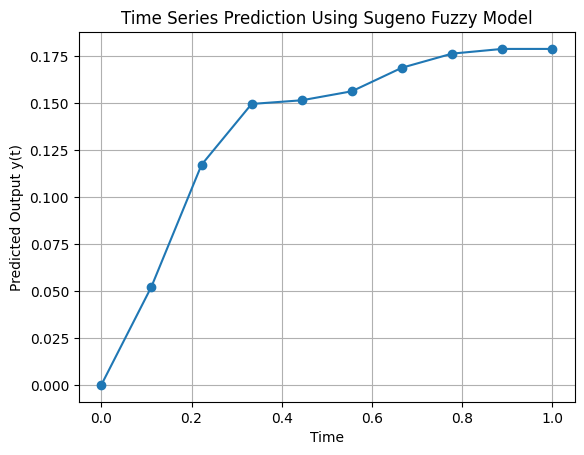

In [13]:
import numpy as np
import matplotlib.pyplot as plt

Y_0 = 0.0
T_STEPS = 10

SUGENO_PARAMS = [
    {'a': 0.6, 'b': 0.4, 'c': 0.1},
    {'a': 0.8, 'b': -0.2, 'c': 0.03},
    {'a': 0.7, 'b': 0.2, 'c': 0.03},
    {'a': 0.9, 'b': 0.0, 'c': 0.0},
    {'a': 0.85, 'b': -0.1, 'c': 0.02},
    {'a': 0.5, 'b': -0.2, 'c': 0.2},
    {'a': 1.1, 'b': 0.5, 'c': -0.1}
]

RULES = [
    {'y': 'Low', 'tau': 'Early'},
    {'y': 'Low', 'tau': 'Late'},
    {'y': 'Medium', 'tau': 'Early'},
    {'y': 'Medium', 'tau': 'Mid'},
    {'y': 'Medium', 'tau': 'Late'},
    {'y': 'High', 'tau': 'Early'},
    {'y': 'High', 'tau': 'Late'},
]

def tri(x, a, b, c):
    if a == b == c:
        return 1.0 if x == a else 0.0
    if x <= a or x >= c:
        return 0.0
    elif a <= x <= b:
        return (x - a) / (b - a) if a != b else 1.0
    elif b < x <= c:
        return (c - x) / (c - b) if b != c else 1.0
    return 0.0

def y_prev(y):
    return {
        'Low': tri(y, -1, -1, 0),
        'Medium': tri(y, -0.5, 0, 0.5),
        'High': tri(y, 0, 1, 1)
    }

def tau(t):
    return {
        'Early': tri(t, 0, 0, 0.5),
        'Mid': tri(t, 0.25, 0.5, 0.75),
        'Late': tri(t, 0.5, 1, 1)
    }

def compute_yt(y, t):
    mu_y = y_prev(y)
    mu_t = tau(t)
    weights = []
    weighted_outputs = []

    for i, rule in enumerate(RULES):
        # Fuzzy membership-based weight
        wi = min(mu_y[rule['y']], mu_t[rule['tau']])
        # Sugeno-style rule output using corresponding parameters
        params = SUGENO_PARAMS[i]
        fi = params['a'] * y + params['b'] * t + params['c']

        weights.append(wi)
        weighted_outputs.append(wi * fi)

    denominator = sum(weights)
    if denominator == 0:
        return y  # fallback to previous value
    return sum(weighted_outputs) / denominator

def main():
    y = Y_0
    y_values = [y]
    time_steps = np.linspace(0, 1, T_STEPS)

    for t in time_steps[1:]:
        y = compute_yt(y, t)  # call compute_yt instead of undefined compute_dy
        y_values.append(y)

    plt.plot(time_steps, y_values, '-o')
    plt.title('Time Series Prediction Using Sugeno Fuzzy Model')
    plt.xlabel('Time')
    plt.ylabel('Predicted Output y(t)')
    plt.grid(True)
    plt.show()

if __name__ == '__main__':
    main()